Dataset link = https://drive.google.com/drive/folders/1yko1IEdlXaT1pGdywyrZXIwsNusNN_y3?usp=drive_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Oasis/Datatsets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Convert Transactions into Behavioral Text

In [6]:
def transaction_to_sentence(row):
    if row['Amount'] < 10:
        amt = 'low_amount'
    elif row['Amount'] < 100:
        amt = 'medium_amount'
    else:
        amt = 'high_amount'

    time_block = 'short_gap' if row['Time'] < 10000 else 'long_gap'

    return f"{amt} {time_block}"

df['sentence'] = df.apply(transaction_to_sentence, axis=1)
df['sentence'].head()


,sentence
0,high_amount short_gap
1,low_amount short_gap
2,high_amount short_gap
3,high_amount short_gap
4,medium_amount short_gap


In [7]:
#NLP Preprocessing
tokens = []
for s in df['sentence']:
    tokens.extend(s.split())


In [8]:
#Autocomplete – Bigram Language Model
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)


In [9]:
def autocomplete(word):
    suggestions = {k[1]:v for k,v in bigram_freq.items() if k[0]==word}
    return sorted(suggestions, key=suggestions.get, reverse=True)[:5]


In [10]:
#Autocorrect – Edit Distance (Spelling Fix)
from difflib import get_close_matches

vocab = set(tokens)

def autocorrect(word):
    return get_close_matches(word, vocab, n=3, cutoff=0.6)


In [11]:
#User Interaction
word = input("Type a word (e.g. 'low_amont'): ")
print("Autocorrect Suggestions:", autocorrect(word))
print("Autocomplete Suggestions:", autocomplete(word))


Type a word (e.g. 'low_amont'): medium_amount
Autocorrect Suggestions: ['medium_amount', 'high_amount', 'low_amount']
Autocomplete Suggestions: ['long_gap', 'short_gap']


In [12]:
#Performance Metrics
print("Total Tokens:", len(tokens))
print("Vocabulary Size:", len(vocab))
print("Total Bigrams:", len(bigram_freq))


Total Tokens: 569614
Vocabulary Size: 5
Total Bigrams: 12


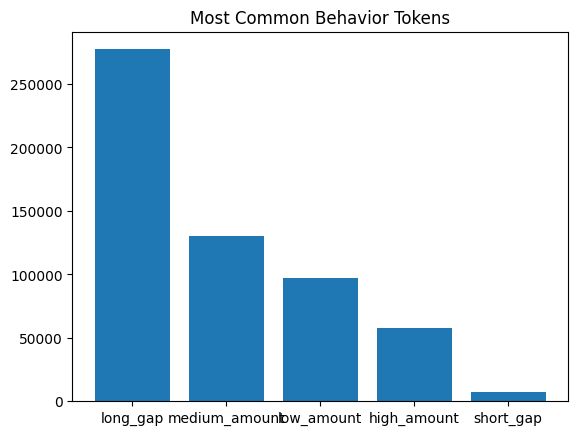

In [13]:
#Visualization
top_words = Counter(tokens).most_common(5)
words, counts = zip(*top_words)

plt.bar(words, counts)
plt.title("Most Common Behavior Tokens")
plt.show()


I transformed structured transaction data into behavioral language patterns and applied NLP autocomplete and autocorrect models to predict and correct transaction behaviour sequences, demonstrating cross-domain NLP innovation.